In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_df = pd.read_csv("../../data/dataset.csv")

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177155 entries, 0 to 177154
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Player_id         177155 non-null  int64  
 1   Season            177155 non-null  int64  
 2   Games             177155 non-null  int64  
 3   PPG               177155 non-null  float64
 4   Goals             177155 non-null  int64  
 5   Assists           177155 non-null  int64  
 6   Yellow_cards      177155 non-null  int64  
 7   Yellow_red_cards  177155 non-null  int64  
 8   Red_cards         177155 non-null  int64  
 9   Penalty_goals     177155 non-null  int64  
 10  Minutes_per_goal  177155 non-null  float64
 11  Minutes_played    177155 non-null  int64  
 12  Club_id           177155 non-null  int64  
 13  Competition       177155 non-null  object 
 14  MarketValue       177155 non-null  int64  
 15  Days_injured      177155 non-null  float64
 16  international     17

In [4]:
raw_df.describe()

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,...,Minutes_played,Club_id,MarketValue,Days_injured,W,D,L,Points,Goales_scored,Goales_conceded
count,1.771550e+05,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.00000,177155.000000,177155.00000,177155.000000,...,177155.000000,177155.000000,1.771550e+05,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000
mean,1.824376e+05,2015.742847,24.540724,1.336631,2.990122,1.944873,3.65975,0.114815,0.10195,0.265671,...,1734.882927,6050.150795,2.242022e+06,20.498665,12.870673,8.502419,11.416917,47.063498,45.079366,41.643820
std,1.666675e+05,4.422104,11.329541,0.583288,4.361801,2.706929,3.02084,0.350687,0.32590,0.902682,...,997.146468,11473.707921,6.317898e+06,1562.933062,5.635269,3.429401,5.357417,17.143184,16.252346,14.683128
min,1.000000e+01,2003.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-32.000000,0.000000,0.000000
25%,5.208200e+04,2013.000000,16.000000,0.900000,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,...,941.000000,430.000000,2.000000e+05,0.000000,9.000000,6.000000,7.000000,35.000000,34.000000,31.000000
50%,1.296270e+05,2016.000000,25.000000,1.350000,1.000000,1.000000,3.00000,0.000000,0.00000,0.000000,...,1695.000000,1245.000000,5.000000e+05,0.000000,12.000000,8.000000,11.000000,46.000000,44.000000,41.000000
75%,2.716220e+05,2019.000000,33.000000,1.750000,4.000000,3.000000,5.00000,0.000000,0.00000,0.000000,...,2464.500000,5781.000000,1.500000e+06,0.000000,16.000000,11.000000,15.000000,58.000000,55.000000,51.000000
max,1.059630e+06,2022.000000,84.000000,4.180000,73.000000,35.000000,26.00000,4.000000,5.00000,15.000000,...,6730.000000,101302.000000,2.000000e+08,657380.000000,35.000000,24.000000,37.000000,113.000000,121.000000,134.000000


In [8]:
df = raw_df.copy()
df.columns = df.columns.str.lower()
df.columns # PPG: Points per game 


Index(['player_id', 'season', 'games', 'ppg', 'goals', 'assists',
       'yellow_cards', 'yellow_red_cards', 'red_cards', 'penalty_goals',
       'minutes_per_goal', 'minutes_played', 'club_id', 'competition',
       'marketvalue', 'days_injured', 'international', 'liga', 'liga_level',
       'w', 'd', 'l', 'points', 'goales_scored', 'goales_conceded'],
      dtype='object')

In [34]:
players = pd.read_csv("../../data/players.csv")  # Kaggle dataset
print(players.columns)


Index(['player_id', 'name', 'current_club_id', 'current_club_name',
       'country_of_citizenship', 'country_of_birth', 'city_of_birth',
       'date_of_birth', 'position', 'sub_position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur', 'agent_name',
       'contract_expiration_date', 'current_club_domestic_competition_id',
       'first_name', 'last_name', 'player_code', 'image_url', 'last_season',
       'url'],
      dtype='object')


In [47]:
df_age_val = pd.merge(df[["player_id", "season", "marketvalue"]], players[["player_id", "date_of_birth"]], on="player_id", how="left")
#df_age_val = df_age_val.groupby("season")
df_age_val = df_age_val.query("season > 2003")

df_age_val["date_of_birth"] = pd.to_datetime(df_age_val["date_of_birth"])
df_age_val["age"] = (pd.to_datetime(f"{df_age_val['season']}-01-01") - df_age_val["date_of_birth"]).astype('<m8[Y]')

# players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
# players['age'] = (pd.to_datetime('2022-01-01') - players['date_of_birth']).astype('<m8[Y]')


#df_age_val = df_age_val.drop(df_age_val[df.season == 2003].index)
df_age_val["season"] = df_age_val["season"].astype("category")

df_age_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177153 entries, 0 to 177154
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   player_id      177153 non-null  int64   
 1   season         177153 non-null  category
 2   marketvalue    177153 non-null  int64   
 3   date_of_birth  177008 non-null  object  
dtypes: category(1), int64(2), object(1)
memory usage: 5.6+ MB


In [29]:
df_age_val.count()

player_id        177153
season           177153
marketvalue      177153
date_of_birth    177008
dtype: int64

In [ ]:
df2 = df_age_val.copy()


<AxesSubplot:xlabel='marketvalue', ylabel='season'>

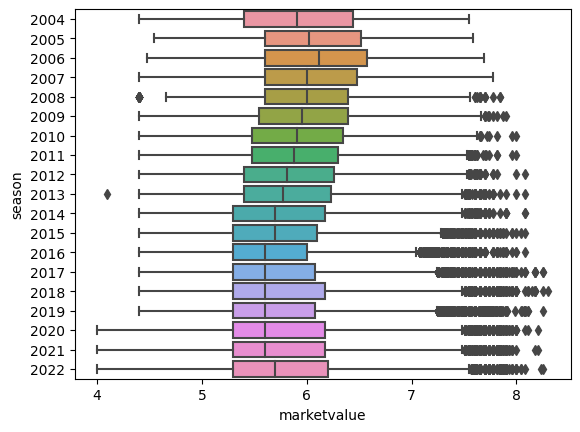

In [50]:
sns.boxplot(df_age_val, x=df_age_val["marketvalue"].apply(np.log10), y="season")

In [ ]:
sns.boxplot(df_age_val)